# Utilities 

Imports commonly used libraries and other helpful functions


In [1]:
#Imports Libraries 

# complex networks package - guide https://networkx.org/ 
import networkx as nx

# visualization packages - https://matplotlib.org/ 
import matplotlib.pyplot as plt
%matplotlib inline
from networkx.drawing.nx_agraph import graphviz_layout

# n-dinsional array tool - https://numpy.org/ 
import numpy as np

import pygraphviz

import matplotlib.colors as mcolors

import scipy as sc

from scipy.io import mmread

from typing import Iterable
# for Notebook
%matplotlib inline

In [ ]:
def draw(G, pos, measures, measure_name):
    
    nodes = nx.draw_networkx_nodes(G, pos, node_size=250, cmap=plt.cm.plasma, 
                                   node_color=list(measures.values()),
                                   nodelist=measures.keys())
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1, base=10))
    # labels = nx.draw_networkx_labels(G, pos)
    edges = nx.draw_networkx_edges(G, pos)

    plt.title(measure_name)
    plt.colorbar(nodes)
    
    plt.axis('off')
    plt.show()

# Question 1

SIR Models

## Graph Ingesting 


In [ ]:
#Ingest edgelist as DiGraph

G1 = nx.read_edgelist(path = "/Users/wdaugherty/ECE 5260/ECE-5260-Graph-Based-Data-Science-for-Networked-Systems/BiWeekly2/hospital_edge-1.txt", create_using=nx.DiGraph())

plt.figure(figsize = (10,10))
nx.draw_circular(G,with_labels = False, node_size =10, edge_color = "grey")
plt.show()

## SIR Simulation 

Finding the finite difference method to calculate the evolution of the probability of infection

In [ ]:
"""
Description: Usese the finite difference method to calculate the finite difference
the evolution of the probability of infection. This

Using the following formula:
    \dot{x}_i(t) = \frac{x_i(t+1)-x_i(t)}{dt} = \sigma_{j \in N_i}\frac{\Beta}{di}(1-x_i())x_j(t)-\gamma(x_i(t))
           = \frac{\Beta}{d_i}(1-x_i(t))\sigma_{j \in N_i}x_j(t)- \gamma(x_i(t))

Notes: 
    d_i is the degree of node i 
    x_i(0) = 1 for some i chosen uniformly
    x_j = 0 for all other nodes
    We randomly choose an infected node to begin the process 
    d_t is the set to equal to 1 

Args:
    G: undirected graph G
    Beta: float values greater than 0.0
    Gamma: float values greater than 0.0

Output:
    res: list of values over time given the infection rate
"""

def SIR_Sim(G, Beta, Gamma):

    #Creates an empty list for the results
    res = []

    #Time 
    t = 100

    #Chooses an initial infected node 
    x_i = np.random.choice(list(G.nodes()))

    #Complement of Infect
    x_j = list(G.nodes()).remove(x_i)

    #For loop to iterate over time 
    for t in range(t):
        
        #Summation loop with local tmeporatry variable 
        temp1 = []
        for i in x_j:
            temp += i - Gamma*x_i

        #Final equality 
        temp2 = (Beta / G.degree(x_i) * (1 - x_j(t)))* temp1

         
        #Adds to the list
        res.append(temp2)
    return res 

In [ ]:
#Creates a list of beta values to be tried in the simulation models
beta_list = [0.2,0.5, 0.9]

#Calls the SIR Simulation Function 
for i in beta_list:
    SIR_Sim(G, i, 0.1)

## SI Simulation

In [ ]:
"""
Description:

Args:

Output:
"""

def SI_Sim():

    res = []
    
    return res 

# Question 2

Hengselmann-Krause bounded confidence model

## Ingesting the data

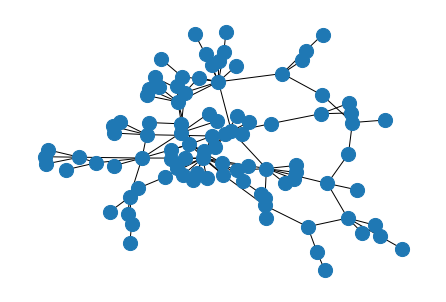

In [2]:
G2 = nx.read_edgelist('rt-retweet.mtx')# Load data here
nx.draw(G2, node_size = 200) #draw initial graph 

## Simulating the Confidence Model

In [53]:
tau = 0.1
time = 1000

#Find max degree

max_degree = 0
for node in G2.nodes:
    if G2.degree(node) > max_degree:
        max_degree = G2.degree(node)
alpha = 0.5/max_degree

#Common defintions 
nodes = list(G2.nodes())
n = len(nodes)

#Find the random walk laplacian
L = np.zeros((n, n))
for l in range(n):
    for m in range(n):
        if l == m:
            L[l][m] = 1
        elif G2.has_edge(nodes[l], nodes[m]) == True:
            L[l][m] = -1/G2.degree(nodes[l])

#Find the mixing matrix              
w = np.add(np.multiply(1-alpha,np.eye(n)), np.multiply(-alpha,L))
x = np.random.random((n, time))


#HK Confidence
for t in range(time-1):
    for i in range(n):
        sum_num = 0
        sum_denum = 0
        for j in range(n): 
            if i ==j:
                continue
            x_i = x[i][t]
            x_j = x[j][t]
            d_ij = np.abs(x_i - x_j)
            u_tau = 1 if d_ij <= tau else 0
            sum_num += (w[i][j]) * u_tau * x_j
            sum_denum += (w[i][j]) * u_tau
        x[i,t+1] = sum_num / sum_denum

/var/folders/87/6bfjhdg13952r0hbf93s28b40000gn/T/ipykernel_67589/4284174230.py:44: RuntimeWarning: invalid value encountered in double_scalars
  x[i,t+1] = sum_num / sum_denum


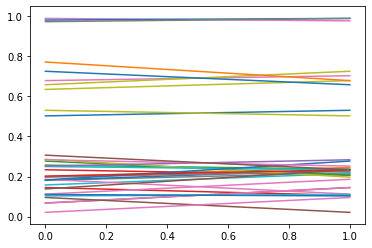

In [54]:
for k in range(len(list(G2.nodes()))):
    plt.plot(x[k,:].T)
plt.show()

In [36]:
G2 = nx.read_edgelist("rt-retweet.mtx")



def HKrause(G, T, iota):
    
    def u(iota, x):
        if x<=iota:
            return 1
        else:
            return 0
    
    nodes = list(G.nodes())
    N = len(nodes)
    x = np.random.random((N, T))
    
    max_degree = 0
    for node in G.nodes:
        if G.degree(node) > max_degree:
            max_degree = G.degree(node)
    alpha = 0.5/max_degree
    
    L = np.zeros((N, N))
    for i in range(N):
        for j in range(N):
            if i == j:
                L[i][j] = 1
            elif G.has_edge(nodes[i], nodes[j]) == True:
                L[i][j] = -1/G.degree(nodes[i])
    W = np.add(np.multiply(1-alpha, np.eye(N)), np.multiply(-alpha, L))    
    
    for t in range(T-1):
        for i in range(N):
            sum1 = 0
            sum2 = 0
            for j in range(N):
                sum1 += W[i][j]*u(iota, abs(x[i][t] - x[j][t])) * x[j][t]
                sum2 += W[i][j]*u(iota, abs(x[i][t] - x[j][t]))
            x[i][t+1] = sum1/sum2
    return x

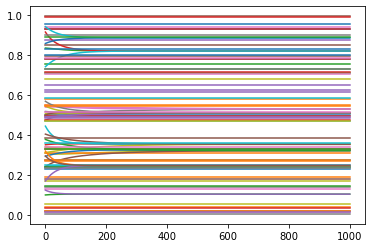

In [51]:
#Draw the graphs
x = HKrause(G2,1000, 0.1)
for k in range(len(list(G2.nodes()))):
    plt.plot(x[k,:].T)
plt.show()

# Question 3 

Electric Grid Simulation 

## Ingesting the data

## Apparent Power Generations

## DC Power Flow

### Calculate the active (real) power injections

### Compute Voltage Angles

## Optimal Power Flow

### Importing the data 

### AC Optimal Power Flow

### Solve for the Optimal g